Analyze Bureau Statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load Data

In [ ]:
# Load data
transport_df = pd.read_csv("C:/Users/Govind Molakalapalli/Documents/GitHub/Flight_Delay_Analyzer/OUTPUTS/processed_bts_data.csv")
transport_df.head()


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,weather_delay_rate,nas_delay_rate,security_delay_rate,late_aircraft_delay_rate,avg_delay_minutes,avg_carrier_delay,avg_weather_delay,avg_nas_delay,avg_security_delay,avg_late_aircraft_delay
0,2025,7,YV,Mesa Airlines Inc.,IAD,"Washington, DC: Washington Dulles International",978.0,234.0,52.94,14.27,...,0.014591,0.068926,0.000000,0.101626,100.072650,70.948243,150.525578,123.156802,0.000000,92.675319
1,2025,7,YX,Republic Airline,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",124.0,16.0,3.44,1.57,...,0.012661,0.061855,0.000000,0.026855,61.250000,40.697674,152.229299,40.677966,0.000000,86.786787
2,2025,7,YX,Republic Airline,IAD,"Washington, DC: Washington Dulles International",963.0,177.0,47.11,12.81,...,0.013302,0.058899,0.000000,0.062679,97.796610,109.063893,130.444965,69.058533,0.000000,109.078860
3,2025,7,G7,GoJet Airlines LLC d/b/a United Express,IAD,"Washington, DC: Washington Dulles International",425.0,120.0,29.85,2.67,...,0.006282,0.095482,0.000000,0.110329,120.033333,88.475712,271.910112,90.463282,0.000000,157.091064
4,2025,7,HA,Hawaiian Airlines Network,LAX,"Los Angeles, CA: Los Angeles International",176.0,78.0,50.82,0.00,...,0.000000,0.000000,0.003068,0.151364,44.153846,42.798111,0.000000,0.000000,40.740741,46.809309


In [ ]:
# Get column names as a list for easy access
column_names = transport_df.columns.tolist()
print("Available columns:")
for i, col in enumerate(column_names):
    print(f"{i}: {col}")

print(f"\nDataFrame shape: {transport_df.shape}")

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,...,weather_delay_rate,nas_delay_rate,security_delay_rate,late_aircraft_delay_rate,avg_delay_minutes,avg_carrier_delay,avg_weather_delay,avg_nas_delay,avg_security_delay,avg_late_aircraft_delay
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,...,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,2024.639785,6.344086,1561.677419,294.738351,90.781398,11.721362,91.266344,0.429301,100.540054,15.709677,...,0.010260,0.068244,0.000446,0.067617,69.821887,74.152050,81.412120,46.317898,17.643788,80.348392
std,0.480493,3.587815,3127.878565,577.997841,166.721505,26.850650,200.360102,1.028228,219.852317,50.189604,...,0.044050,0.055230,0.001873,0.042752,28.866863,39.383117,73.361712,28.105475,43.428625,49.919714
min,2024.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024.000000,3.000000,120.000000,27.000000,7.760000,0.252500,6.647500,0.000000,6.537500,0.000000,...,0.000853,0.034039,0.000000,0.037086,55.000000,53.245216,25.463570,33.455051,0.000000,57.219814
50%,2025.000000,6.000000,552.000000,96.000000,30.955000,2.040000,29.665000,0.000000,27.895000,3.000000,...,0.004315,0.052958,0.000000,0.061211,65.763170,67.726668,75.134409,41.761599,0.000000,77.112362
75%,2025.000000,10.000000,1672.750000,318.750000,96.130000,8.910000,92.182500,0.177500,106.815000,13.000000,...,0.010074,0.086917,0.000114,0.092777,82.134180,88.491664,112.334589,54.448298,21.991329,95.787331
max,2025.000000,12.000000,21854.000000,4877.000000,1334.900000,188.190000,1517.900000,8.080000,2154.980000,852.000000,...,1.000000,0.409333,0.032667,0.279146,426.000000,424.418605,479.000000,400.000000,476.190476,553.000000


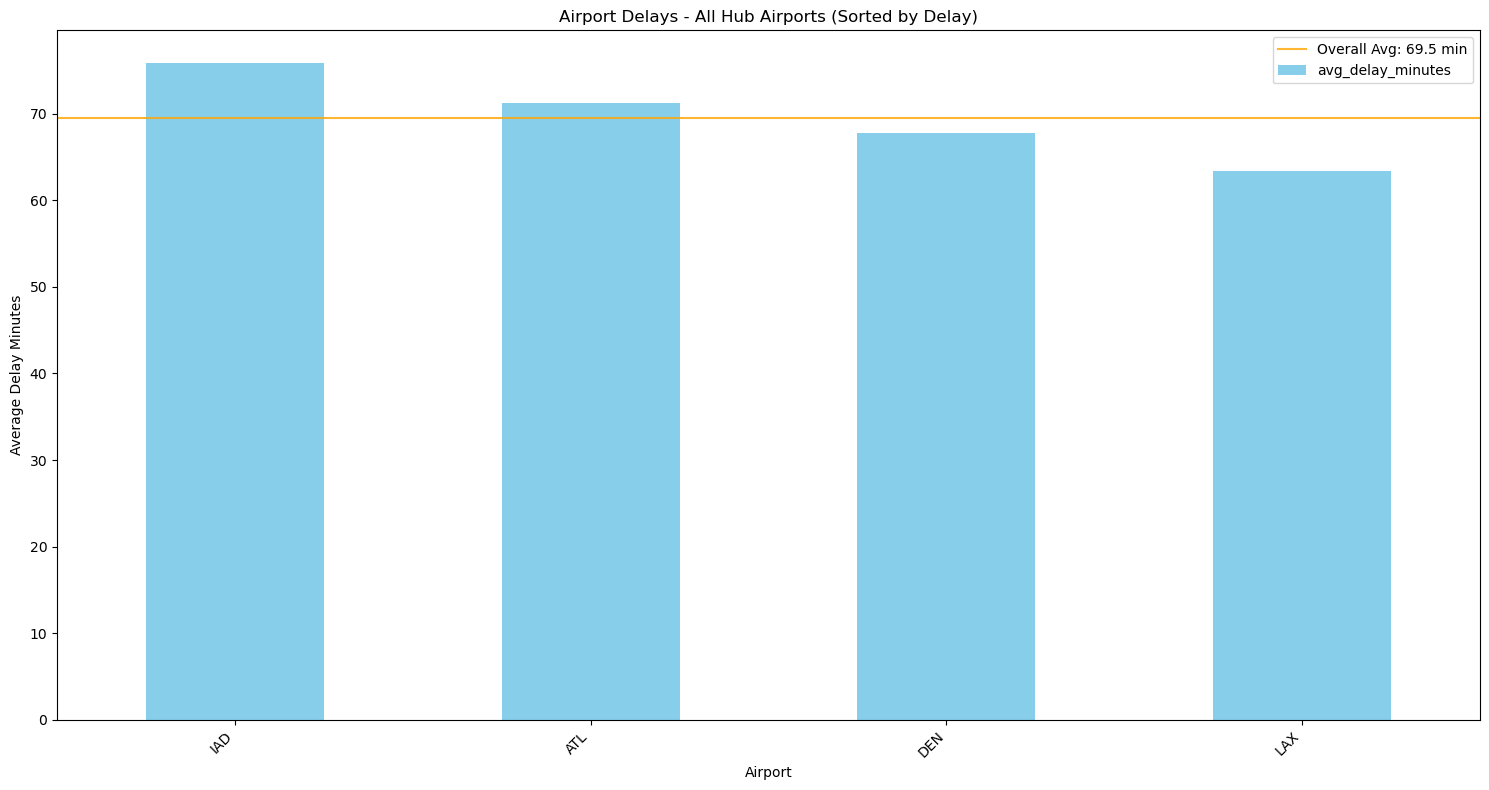

All airports sorted by delay (worst to best):
airport
IAD    75.854017
ATL    71.233381
DEN    67.733338
LAX    63.365914
Name: avg_delay_minutes, dtype: float64

📊 STATISTICS:
Overall average delay: 69.55 minutes
Worst 5 airports average: 69.55 minutes
Best 5 airports average: 69.55 minutes
Range (max - min): 12.49 minutes
Number of airports: 4


In [36]:
# Create chart for airport delays - All airports sorted
# Group by airport and get average delay minutes
airport_delays = transport_df.groupby('airport')['avg_delay_minutes'].mean().sort_values(ascending=False)

# Calculate overall statistics
overall_avg = airport_delays.mean()
range_delay = airport_delays.max() - airport_delays.min()

# Create the chart
plt.figure(figsize=(15, 8))
airport_delays.plot(kind='bar', color='skyblue')
plt.title('Airport Delays - All Hub Airports (Sorted by Delay)')
plt.xlabel('Airport')
plt.ylabel('Average Delay Minutes')
plt.xticks(rotation=45, ha='right')

# Add average lines
plt.axhline(y=overall_avg, color='orange', linestyle='-', alpha=0.8, label=f'Overall Avg: {overall_avg:.1f} min')

plt.legend()

plt.tight_layout()
plt.show()

# Show the data and statistics
print("All airports sorted by delay (worst to best):")
print(airport_delays)
print(f"\n📊 STATISTICS:")
print(f"Overall average delay: {overall_avg:.2f} minutes")
print(f"Worst 5 airports average: {worst_avg:.2f} minutes")
print(f"Best 5 airports average: {best_avg:.2f} minutes")
print(f"Range (max - min): {range_delay:.2f} minutes")
print(f"Number of airports: {len(airport_delays)}")


In [ ]:
# Correlation Analysis: Delay Minutes vs Key Factors with R² and Statistical Tests
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Select the key columns for correlation analysis
key_columns = [
    'avg_delay_minutes', 'month', 'avg_late_aircraft_delay', 'avg_weather_delay',
    'late_aircraft_delay_rate', 'weather_delay_rate', 'carrier_name'
]

# Create correlation matrix for numeric columns
numeric_cols = ['avg_delay_minutes', 'month', 'avg_late_aircraft_delay', 'avg_weather_delay',
                'late_aircraft_delay_rate', 'weather_delay_rate']

correlation_data = transport_df[numeric_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix: Delay Minutes vs Key Factors')
plt.tight_layout()
plt.show()

# Statistical analysis with R², t-tests, and F-tests
print("STATISTICAL ANALYSIS:")
print("="*60)
print(f"{'Factor':<25} {'Corr':<8} {'R²':<8} {'t-stat':<10} {'p-value':<10} {'Significant'}")
print("-" * 70)

y = transport_df['avg_delay_minutes'].values

for col in numeric_cols:
    if col != 'avg_delay_minutes':
        x = transport_df[col].values
        
        # Remove NaN values
        mask = ~(np.isnan(x) | np.isnan(y))
        x_clean = x[mask]
        y_clean = y[mask]
        
        if len(x_clean) > 1:
            # Correlation
            corr = np.corrcoef(x_clean, y_clean)[0, 1]
            
            # R²
            model = LinearRegression()
            model.fit(x_clean.reshape(-1, 1), y_clean)
            r2 = model.score(x_clean.reshape(-1, 1), y_clean)
            
            # t-test for correlation
            t_stat, p_value = stats.pearsonr(x_clean, y_clean)
            
            # Significance
            significant = "Yes" if p_value < 0.05 else "No"
            
            print(f"{col:<25} {corr:<8.3f} {r2:<8.3f} {t_stat:<10.3f} {p_value:<10.3f} {significant}")

print(f"\nDataFrame shape: {transport_df.shape}")
print(f"Columns used: {numeric_cols}")
print(f"\nNote: p-value < 0.05 indicates statistical significance")


In [ ]:
# Carrier Analysis: Delay Minutes by Carrier
carrier_delays = transport_df.groupby('carrier_name')['avg_delay_minutes'].agg(['mean', 'count', 'std']).round(2)
carrier_delays = carrier_delays.sort_values('mean', ascending=False)

# Create carrier delay chart
plt.figure(figsize=(12, 8))
carrier_delays['mean'].plot(kind='bar', color='lightcoral')
plt.title('Average Delay Minutes by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Average Delay Minutes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Carrier Performance (sorted by average delay):")
print("="*60)
print(carrier_delays)

# Statistical summary
print(f"\n📊 CARRIER STATISTICS:")
print(f"Number of carriers: {len(carrier_delays)}")
print(f"Highest average delay: {carrier_delays['mean'].max():.2f} minutes")
print(f"Lowest average delay: {carrier_delays['mean'].min():.2f} minutes")
print(f"Range: {carrier_delays['mean'].max() - carrier_delays['mean'].min():.2f} minutes")


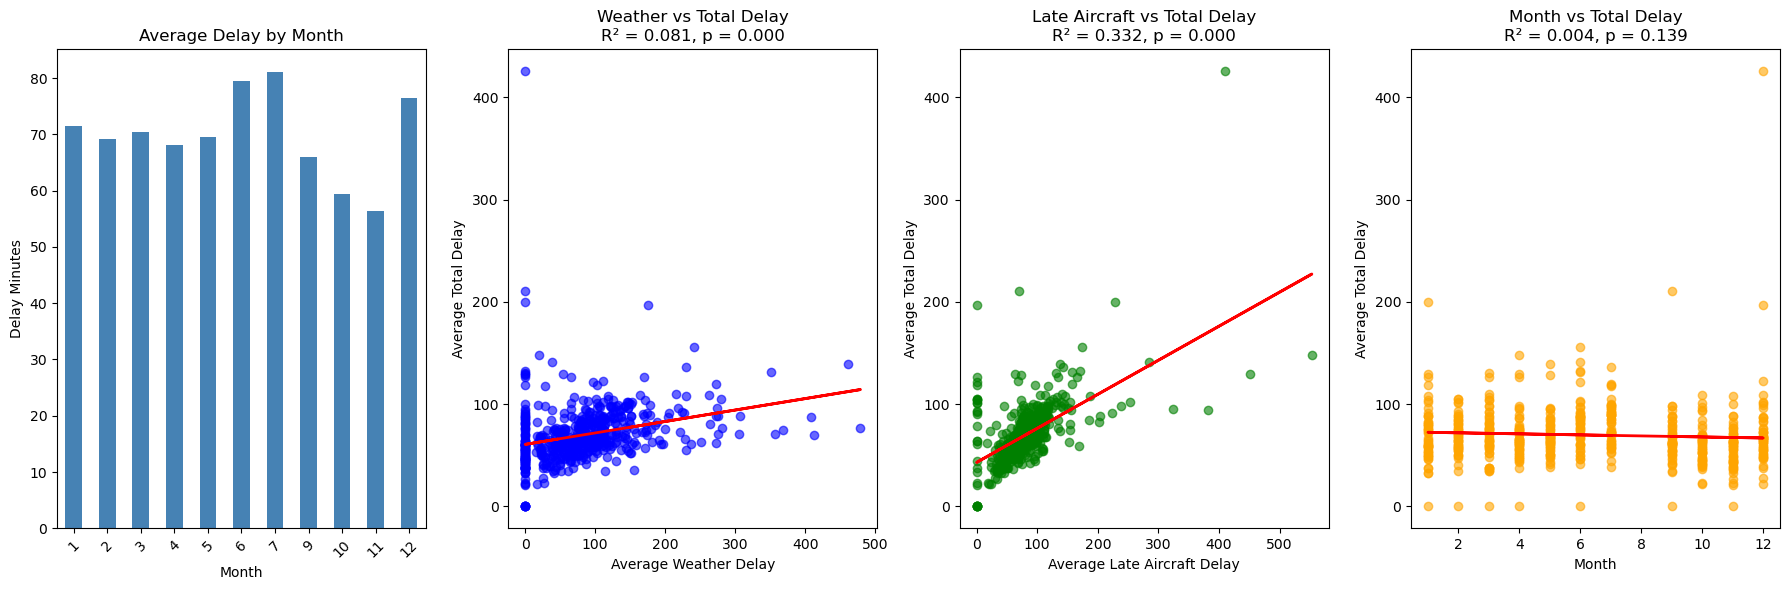

REGRESSION ANALYSIS SUMMARY:
Weather Delay:     R² = 0.081, Correlation = 0.284, p-value = 0.000
Late Aircraft:     R² = 0.332, Correlation = 0.576, p-value = 0.000
Month:             R² = 0.004, Correlation = -0.063, p-value = 0.139

Monthly Delay Analysis:
month
1     71.54
2     69.26
3     70.38
4     68.09
5     69.50
6     79.42
7     81.14
9     65.94
10    59.49
11    56.38
12    76.43
Name: avg_delay_minutes, dtype: float64

Weather vs Late Aircraft Analysis by Month:
       avg_delay_minutes  avg_weather_delay  avg_late_aircraft_delay  \
month                                                                  
1                  71.54              84.38                    90.82   
2                  69.26              83.98                    80.29   
3                  70.38              84.42                    73.87   
4                  68.09              68.89                    82.36   
5                  69.50              87.83                    83.94   
6             

In [40]:
# Monthly and Weather Delay Analysis with Regression Lines and Statistical Tests
from scipy import stats
from sklearn.linear_model import LinearRegression

# Monthly delay patterns
monthly_delays = transport_df.groupby('month')['avg_delay_minutes'].mean().round(2)

# Weather vs Late Aircraft delays
weather_analysis = transport_df.groupby('month').agg({
    'avg_delay_minutes': 'mean',
    'avg_weather_delay': 'mean',
    'avg_late_aircraft_delay': 'mean',
    'weather_delay_rate': 'mean',
    'late_aircraft_delay_rate': 'mean'
}).round(2)

# Create monthly delay chart with regression analysis
plt.figure(figsize=(18, 6))

# 1. Monthly delays
plt.subplot(1, 4, 1)
monthly_delays.plot(kind='bar', color='steelblue')
plt.title('Average Delay by Month')
plt.xlabel('Month')
plt.ylabel('Delay Minutes')
plt.xticks(rotation=45)

# 2. Weather delay vs Total delay with regression
plt.subplot(1, 4, 2)
x_weather = transport_df['avg_weather_delay'].values
y_total = transport_df['avg_delay_minutes'].values

# Remove NaN values
mask = ~(np.isnan(x_weather) | np.isnan(y_total))
x_clean = x_weather[mask]
y_clean = y_total[mask]

plt.scatter(x_clean, y_clean, alpha=0.6, color='blue')

# Add regression line
if len(x_clean) > 1:
    model = LinearRegression()
    model.fit(x_clean.reshape(-1, 1), y_clean)
    y_pred = model.predict(x_clean.reshape(-1, 1))
    plt.plot(x_clean, y_pred, color='red', linewidth=2)
    
    # Calculate R²
    r2_weather = model.score(x_clean.reshape(-1, 1), y_clean)
    corr_weather, p_weather = stats.pearsonr(x_clean, y_clean)
    
    plt.title(f'Weather vs Total Delay\nR² = {r2_weather:.3f}, p = {p_weather:.3f}')

plt.xlabel('Average Weather Delay')
plt.ylabel('Average Total Delay')

# 3. Late aircraft delay vs Total delay with regression
plt.subplot(1, 4, 3)
x_late = transport_df['avg_late_aircraft_delay'].values
y_total = transport_df['avg_delay_minutes'].values

# Remove NaN values
mask = ~(np.isnan(x_late) | np.isnan(y_total))
x_clean = x_late[mask]
y_clean = y_total[mask]

plt.scatter(x_clean, y_clean, alpha=0.6, color='green')

# Add regression line
if len(x_clean) > 1:
    model = LinearRegression()
    model.fit(x_clean.reshape(-1, 1), y_clean)
    y_pred = model.predict(x_clean.reshape(-1, 1))
    plt.plot(x_clean, y_pred, color='red', linewidth=2)
    
    # Calculate R²
    r2_late = model.score(x_clean.reshape(-1, 1), y_clean)
    corr_late, p_late = stats.pearsonr(x_clean, y_clean)
    
    plt.title(f'Late Aircraft vs Total Delay\nR² = {r2_late:.3f}, p = {p_late:.3f}')

plt.xlabel('Average Late Aircraft Delay')
plt.ylabel('Average Total Delay')

# 4. Month vs Total delay with regression
plt.subplot(1, 4, 4)
x_month = transport_df['month'].values
y_total = transport_df['avg_delay_minutes'].values

# Remove NaN values
mask = ~(np.isnan(x_month) | np.isnan(y_total))
x_clean = x_month[mask]
y_clean = y_total[mask]

plt.scatter(x_clean, y_clean, alpha=0.6, color='orange')

# Add regression line
if len(x_clean) > 1:
    model = LinearRegression()
    model.fit(x_clean.reshape(-1, 1), y_clean)
    y_pred = model.predict(x_clean.reshape(-1, 1))
    plt.plot(x_clean, y_pred, color='red', linewidth=2)
    
    # Calculate R²
    r2_month = model.score(x_clean.reshape(-1, 1), y_clean)
    corr_month, p_month = stats.pearsonr(x_clean, y_clean)
    
    plt.title(f'Month vs Total Delay\nR² = {r2_month:.3f}, p = {p_month:.3f}')

plt.xlabel('Month')
plt.ylabel('Average Total Delay')

plt.tight_layout()
plt.show()

# Statistical summary
print("REGRESSION ANALYSIS SUMMARY:")
print("="*50)
print(f"Weather Delay:     R² = {r2_weather:.3f}, Correlation = {corr_weather:.3f}, p-value = {p_weather:.3f}")
print(f"Late Aircraft:     R² = {r2_late:.3f}, Correlation = {corr_late:.3f}, p-value = {p_late:.3f}")
print(f"Month:             R² = {r2_month:.3f}, Correlation = {corr_month:.3f}, p-value = {p_month:.3f}")

print("\nMonthly Delay Analysis:")
print("="*40)
print(monthly_delays)

print("\nWeather vs Late Aircraft Analysis by Month:")
print("="*50)
print(weather_analysis)


In [ ]:
# Advanced Statistical Analysis: F-test and ANOVA for Carriers
from scipy.stats import f_oneway
from scipy import stats

# Prepare data for ANOVA (F-test)
carrier_groups = []
carrier_names = []

for carrier in transport_df['carrier_name'].unique():
    carrier_data = transport_df[transport_df['carrier_name'] == carrier]['avg_delay_minutes'].dropna()
    if len(carrier_data) > 0:
        carrier_groups.append(carrier_data)
        carrier_names.append(carrier)

# Perform ANOVA (F-test)
f_stat, p_value = f_oneway(*carrier_groups)

print("CARRIER STATISTICAL ANALYSIS:")
print("="*50)
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.6f}")
print(f"Significant difference between carriers: {'Yes' if p_value < 0.05 else 'No'}")

# Post-hoc analysis: Pairwise t-tests for top carriers
print(f"\nPOST-HOC ANALYSIS (Top 5 vs Bottom 5 carriers):")
print("="*60)

# Get top 5 and bottom 5 carriers
carrier_means = transport_df.groupby('carrier_name')['avg_delay_minutes'].mean().sort_values(ascending=False)
top_5_carriers = carrier_means.head(5).index.tolist()
bottom_5_carriers = carrier_means.tail(5).index.tolist()

# Perform t-test between top and bottom groups
top_group = transport_df[transport_df['carrier_name'].isin(top_5_carriers)]['avg_delay_minutes'].dropna()
bottom_group = transport_df[transport_df['carrier_name'].isin(bottom_5_carriers)]['avg_delay_minutes'].dropna()

t_stat, t_p_value = stats.ttest_ind(top_group, bottom_group)

print(f"Top 5 carriers average: {top_group.mean():.2f} ± {top_group.std():.2f}")
print(f"Bottom 5 carriers average: {bottom_group.mean():.2f} ± {bottom_group.std():.2f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {t_p_value:.6f}")
print(f"Significant difference: {'Yes' if t_p_value < 0.05 else 'No'}")

# Effect size (Cohen's d)
pooled_std = np.sqrt(((len(top_group) - 1) * top_group.var() + (len(bottom_group) - 1) * bottom_group.var()) / 
                     (len(top_group) + len(bottom_group) - 2))
cohens_d = (top_group.mean() - bottom_group.mean()) / pooled_std

print(f"Effect size (Cohen's d): {cohens_d:.3f}")
print(f"Effect interpretation: {'Large' if abs(cohens_d) > 0.8 else 'Medium' if abs(cohens_d) > 0.5 else 'Small'}")

print(f"\nTop 5 carriers: {top_5_carriers}")
print(f"Bottom 5 carriers: {bottom_5_carriers}")


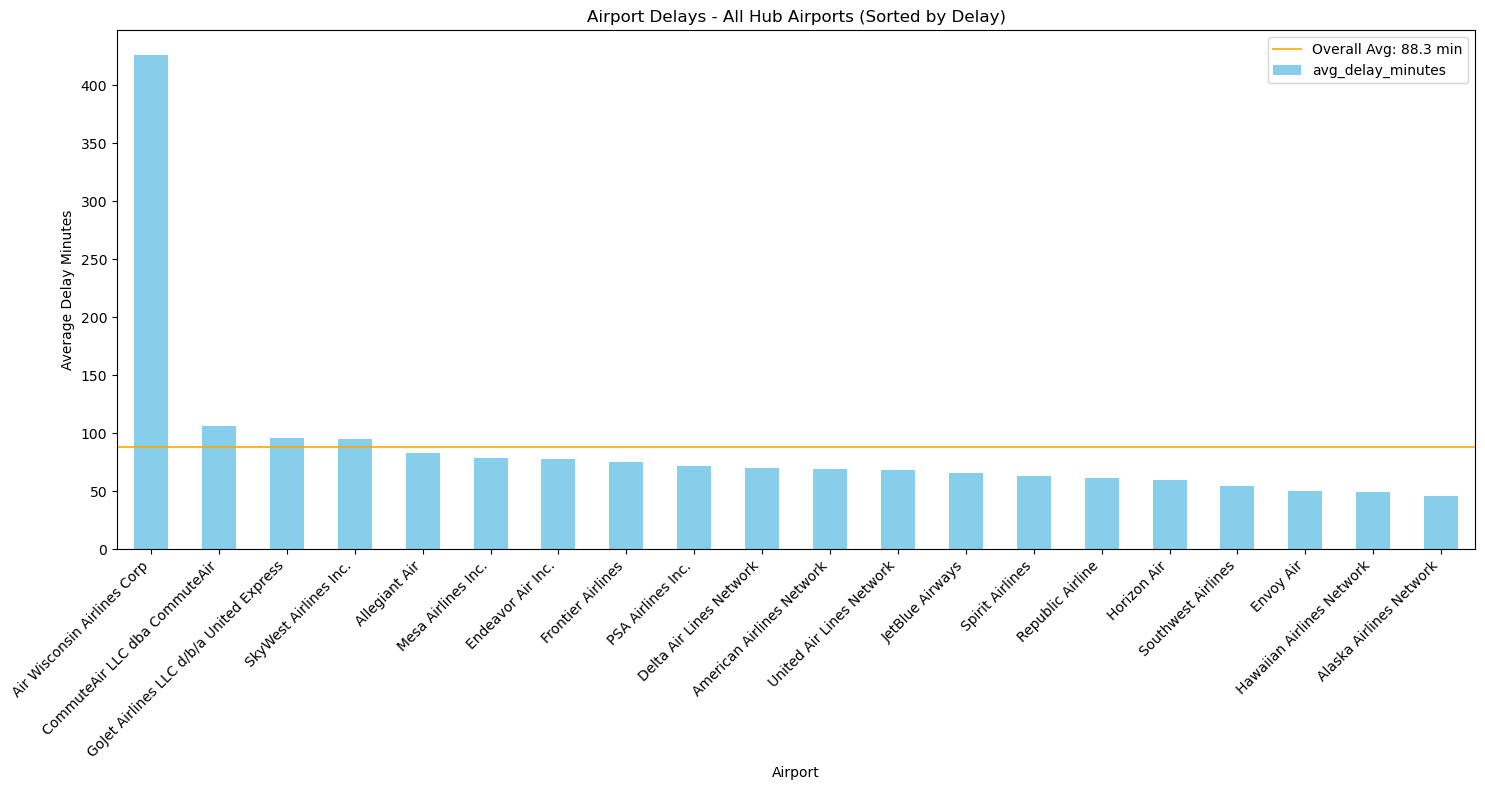

In [38]:
# Create chart for airport delays - All airports sorted
# Group by airport and get average delay minutes
airport_delays = transport_df.groupby('carrier_name')['avg_delay_minutes'].mean().sort_values(ascending=False)

# Calculate overall statistics
overall_avg = airport_delays.mean()
range_delay = airport_delays.max() - airport_delays.min()

# Create the chart
plt.figure(figsize=(15, 8))
airport_delays.plot(kind='bar', color='skyblue')
plt.title('Airport Delays - All Hub Airports (Sorted by Delay)')
plt.xlabel('Airport')
plt.ylabel('Average Delay Minutes')
plt.xticks(rotation=45, ha='right')

# Add average lines
plt.axhline(y=overall_avg, color='orange', linestyle='-', alpha=0.8, label=f'Overall Avg: {overall_avg:.1f} min')

plt.legend()

plt.tight_layout()
plt.show()


# Now you can access any column by index or name
# Examples:
# transport_df[column_names[4]]  # Access 5th column
# transport_df['airport']       # Access by name
# transport_df.groupby('airport').size()  # Group by any column

In [20]:
# Let's examine the first few rows to understand the data structure
print("First 5 rows of the dataset:")
print(transport_df.head())

print("\n" + "="*50)
print("Data types:")
print(transport_df.dtypes)


First 5 rows of the dataset:
   year  month carrier                             carrier_name airport  \
0  2025      7      YV                       Mesa Airlines Inc.     IAD   
1  2025      7      YX                         Republic Airline     ATL   
2  2025      7      YX                         Republic Airline     IAD   
3  2025      7      G7  GoJet Airlines LLC d/b/a United Express     IAD   
4  2025      7      HA                Hawaiian Airlines Network     LAX   

                                        airport_name  arr_flights  arr_del15  \
0    Washington, DC: Washington Dulles International        978.0      234.0   
1  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        124.0       16.0   
2    Washington, DC: Washington Dulles International        963.0      177.0   
3    Washington, DC: Washington Dulles International        425.0      120.0   
4         Los Angeles, CA: Los Angeles International        176.0       78.0   

   carrier_ct  weather_ct  ...  weather

In [25]:
# Get all column names as a list
column_names = transport_df.columns.tolist()
print("All column names:")
for i, col in enumerate(column_names):
    print(f"{i}: {col}")

# Let's look at the first few rows to understand the data
print("\nFirst 3 rows:")
transport_df.head(3)


All column names:
0: year
1: month
2: carrier
3: carrier_name
4: airport
5: airport_name
6: arr_flights
7: arr_del15
8: carrier_ct
9: weather_ct
10: nas_ct
11: security_ct
12: late_aircraft_ct
13: arr_cancelled
14: arr_diverted
15: arr_delay
16: carrier_delay
17: weather_delay
18: nas_delay
19: security_delay
20: late_aircraft_delay
21: date
22: total_delay_rate
23: carrier_delay_rate
24: weather_delay_rate
25: nas_delay_rate
26: security_delay_rate
27: late_aircraft_delay_rate
28: avg_delay_minutes
29: avg_carrier_delay
30: avg_weather_delay
31: avg_nas_delay
32: avg_security_delay
33: avg_late_aircraft_delay

First 3 rows:


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,weather_delay_rate,nas_delay_rate,security_delay_rate,late_aircraft_delay_rate,avg_delay_minutes,avg_carrier_delay,avg_weather_delay,avg_nas_delay,avg_security_delay,avg_late_aircraft_delay
0,2025,7,YV,Mesa Airlines Inc.,IAD,"Washington, DC: Washington Dulles International",978.0,234.0,52.94,14.27,...,0.014591,0.068926,0.0,0.101626,100.07265,70.948243,150.525578,123.156802,0.0,92.675319
1,2025,7,YX,Republic Airline,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",124.0,16.0,3.44,1.57,...,0.012661,0.061855,0.0,0.026855,61.25000,40.697674,152.229299,40.677966,0.0,86.786787
2,2025,7,YX,Republic Airline,IAD,"Washington, DC: Washington Dulles International",963.0,177.0,47.11,12.81,...,0.013302,0.058899,0.0,0.062679,97.79661,109.063893,130.444965,69.058533,0.0,109.078860


Delays By Airport

In [30]:
airport_delays = transport_df.groupby('avg_delay_minutes')['airport'].mean()

TypeError: agg function failed [how->mean,dtype->object]

Delays By Carrier